## GDELT Data Exploration

### Data Parsing
Parse the daily csv file and the data header file.
- Daily data: http://data.gdeltproject.org/events/index.html
- Column data: https://www.gdeltproject.org/data/lookups/CSV.header.dailyupdates.txt

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read tab-delimited csv file for data columns
columns = pd.read_csv('./Daily Conflict Data Columns.txt',sep='\t')
column_names = list(columns.columns)

In [3]:
# Read tab-delimited csv file for data
from datetime import datetime as dt, timedelta
day = dt.today()
yesterday = day - timedelta(days=1)
date = str(yesterday.year) + '{:02d}'.format(yesterday.month) + '{:02d}'.format(yesterday.day)

In [4]:
base_url = 'http://data.gdeltproject.org/events/'
url_ending = '.export.CSV.zip'
daily_url = base_url + date + url_ending

In [5]:
df = pd.read_csv(daily_url,sep='\t',error_bad_lines=False,names=column_names)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Data Inspection

In [6]:
display(df.head())
display(df.info())

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,991158199,20200621,202006,2020,2020.4685,LEG,LAWMAKER,NaN,NaN,NaN,...,NaN,2,"Illinois, United States",US,USIL,40.3363,-89.0022,IL,20210621,https://qctimes.com/news/state-and-regional/go...
1,991158200,20200621,202006,2020,2020.4685,USA,CHICAGO,USA,NaN,NaN,...,423587,3,"Chicago, Illinois, United States",US,USIL,41.8500,-87.6501,423587,20210621,https://qctimes.com/news/state-and-regional/go...
2,991158201,20200621,202006,2020,2020.4685,USA,CHICAGO,USA,NaN,NaN,...,IL,2,"Illinois, United States",US,USIL,40.3363,-89.0022,IL,20210621,https://qctimes.com/news/state-and-regional/go...
3,991158202,20210522,202105,2021,2021.3890,NaN,NaN,NaN,NaN,NaN,...,-3378435,4,"Kabul, Kabol, Afghanistan",AF,AF13,34.5167,69.1833,-3378435,20210621,https://ricochet.com/986125/our-feckless-state...
4,991158203,20210522,202105,2021,2021.3890,NaN,NaN,NaN,NaN,NaN,...,-2594490,4,"Donington, Lincolnshire, United Kingdom",UK,UKH7,52.9000,-0.2000,-2594490,20210621,https://www.pressandjournal.co.uk/lifestyle/mu...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108921 entries, 0 to 108920
Data columns (total 58 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   GLOBALEVENTID          108921 non-null  int64  
 1   SQLDATE                108921 non-null  int64  
 2   MonthYear              108921 non-null  int64  
 3   Year                   108921 non-null  int64  
 4   FractionDate           108921 non-null  float64
 5   Actor1Code             98049 non-null   object 
 6   Actor1Name             98049 non-null   object 
 7   Actor1CountryCode      60717 non-null   object 
 8   Actor1KnownGroupCode   1661 non-null    object 
 9   Actor1EthnicCode       842 non-null     object 
 10  Actor1Religion1Code    1411 non-null    object 
 11  Actor1Religion2Code    360 non-null     object 
 12  Actor1Type1Code        47337 non-null   object 
 13  Actor1Type2Code        3629 non-null    object 
 14  Actor1Type3Code        66 non-null  

None

<function matplotlib.pyplot.show(*args, **kw)>

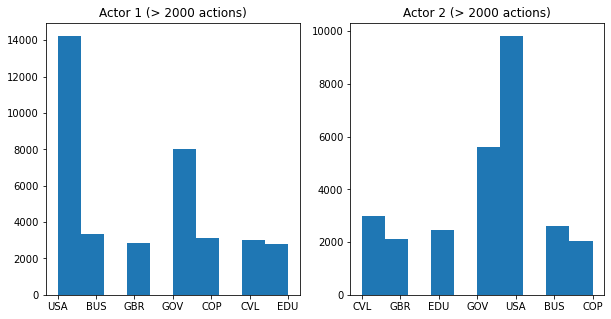

In [7]:
fig = plt.figure(figsize = (10,5))
df2 = df.groupby('Actor1Code').filter(lambda x: len(x) > 2000)
df3 = df.groupby('Actor2Code').filter(lambda x: len(x) > 2000)

ax1 = plt.subplot (1, 2, 1)
ax1.hist(df2['Actor1Code'])
plt.title('Actor 1 (> 2000 actions)')

ax2 = plt.subplot (1, 2, 2)
ax2.hist(df3['Actor2Code'])
plt.title('Actor 2 (> 2000 actions)')

plt.show

### Website Scraping
- Automate daily data extraction with Python script
- Get URLs for single csv files

In [8]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [9]:
url = 'http://data.gdeltproject.org/events/index.html'

import requests
import bs4

import sys 
sys.setrecursionlimit(100000) # Need to set higher recursion limit (Python default = 1000), as there are more child items

def get_page(url):
    web_pages = requests.get(url).text
    soup = bs4.BeautifulSoup(web_pages, 'html.parser')
    return soup

soup = get_page(url)
soup

<head><title>All GDELT Event Files</title></head><h1>All GDELT Event Files</h1><ul>
<li><a href="md5sums">md5sums</a>
<li><a href="filesizes">filesizes</a>
<li><a href="GDELT.MASTERREDUCEDV2.1979-2013.zip">GDELT.MASTERREDUCEDV2.1979-2013.zip</a> (1.1GB) (MD5: f6fcb7e955e35f93c9dae427c07b545d)
<li><a href="20210621.export.CSV.zip">20210621.export.CSV.zip</a> (7.2MB) (MD5: 34d7483ed58f532327f6a74fedaf7096)
<li><a href="20210620.export.CSV.zip">20210620.export.CSV.zip</a> (4.0MB) (MD5: 05899a42e03f232326730d013b0a7976)
<li><a href="20210619.export.CSV.zip">20210619.export.CSV.zip</a> (4.3MB) (MD5: 8df27168c36313a72823b76db1144063)
<li><a href="20210618.export.CSV.zip">20210618.export.CSV.zip</a> (7.8MB) (MD5: a4b26eca90c13f74d75f13064706bee9)
<li><a href="20210617.export.CSV.zip">20210617.export.CSV.zip</a> (8.5MB) (MD5: 45515614568f0b6dbd0552465493199d)
<li><a href="20210616.export.CSV.zip">20210616.export.CSV.zip</a> (8.5MB) (MD5: af4b89dc667815243386bbf6b5ea5eb1)
<li><a href="20210615.

In [10]:
def get_files(soup):
    return soup.find_all('a')

get_files(get_page(url))

[<a href="md5sums">md5sums</a>,
 <a href="filesizes">filesizes</a>,
 <a href="GDELT.MASTERREDUCEDV2.1979-2013.zip">GDELT.MASTERREDUCEDV2.1979-2013.zip</a>,
 <a href="20210621.export.CSV.zip">20210621.export.CSV.zip</a>,
 <a href="20210620.export.CSV.zip">20210620.export.CSV.zip</a>,
 <a href="20210619.export.CSV.zip">20210619.export.CSV.zip</a>,
 <a href="20210618.export.CSV.zip">20210618.export.CSV.zip</a>,
 <a href="20210617.export.CSV.zip">20210617.export.CSV.zip</a>,
 <a href="20210616.export.CSV.zip">20210616.export.CSV.zip</a>,
 <a href="20210615.export.CSV.zip">20210615.export.CSV.zip</a>,
 <a href="20210614.export.CSV.zip">20210614.export.CSV.zip</a>,
 <a href="20210613.export.CSV.zip">20210613.export.CSV.zip</a>,
 <a href="20210612.export.CSV.zip">20210612.export.CSV.zip</a>,
 <a href="20210611.export.CSV.zip">20210611.export.CSV.zip</a>,
 <a href="20210610.export.CSV.zip">20210610.export.CSV.zip</a>,
 <a href="20210609.export.CSV.zip">20210609.export.CSV.zip</a>,
 <a href="20

In [11]:
# Enter number of files you want to download (with '0' being the most recent file)
x = 0
y = 1

In [12]:
# Creates Download Links 
all_links = soup.find_all('a',href = True)
all_links = all_links[3:]
urls = []
download_links = []
base_url = 'http://data.gdeltproject.org/events/'

for i in range(x,y):
    urls.append(all_links[i]['href'])
    download_links.append(base_url + urls[i])
    print(all_links[i]['href'])
    
download_links

20210621.export.CSV.zip


['http://data.gdeltproject.org/events/20210621.export.CSV.zip']

In [13]:
# Creates Pandas Dataframes from downloaded CSV files and merges them all into one dataframe
dataframes = []

for i in range(x,y):
    dataframes.append(pd.read_csv(download_links[i],sep='\t',error_bad_lines=False,names=column_names))

final_df = pd.concat(dataframes)
final_df

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,991158199,20200621,202006,2020,2020.4685,LEG,LAWMAKER,NaN,NaN,NaN,...,NaN,2,"Illinois, United States",US,USIL,40.3363,-89.0022,IL,20210621,https://qctimes.com/news/state-and-regional/go...
1,991158200,20200621,202006,2020,2020.4685,USA,CHICAGO,USA,NaN,NaN,...,423587,3,"Chicago, Illinois, United States",US,USIL,41.8500,-87.6501,423587,20210621,https://qctimes.com/news/state-and-regional/go...
2,991158201,20200621,202006,2020,2020.4685,USA,CHICAGO,USA,NaN,NaN,...,IL,2,"Illinois, United States",US,USIL,40.3363,-89.0022,IL,20210621,https://qctimes.com/news/state-and-regional/go...
3,991158202,20210522,202105,2021,2021.3890,NaN,NaN,NaN,NaN,NaN,...,-3378435,4,"Kabul, Kabol, Afghanistan",AF,AF13,34.5167,69.1833,-3378435,20210621,https://ricochet.com/986125/our-feckless-state...
4,991158203,20210522,202105,2021,2021.3890,NaN,NaN,NaN,NaN,NaN,...,-2594490,4,"Donington, Lincolnshire, United Kingdom",UK,UKH7,52.9000,-0.2000,-2594490,20210621,https://www.pressandjournal.co.uk/lifestyle/mu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108916,991325366,20210621,202106,2021,2021.4685,USAMED,REUTERS,USA,NaN,NaN,...,CO,2,"Colorado, United States",US,USCO,39.0646,-105.3270,CO,20210621,https://www.reuters.com/legal/legalindustry/pe...
108917,991325367,20210621,202106,2021,2021.4685,VNM,VIETNAM,VNM,NaN,NaN,...,UK,1,United Kingdom,UK,UK,54.0000,-4.0000,UK,20210621,https://www.mirror.co.uk/news/politics/uk-form...
108918,991325368,20210621,202106,2021,2021.4685,VNM,VIETNAM,VNM,NaN,NaN,...,UK,1,United Kingdom,UK,UK,54.0000,-4.0000,UK,20210621,https://www.mirror.co.uk/news/politics/uk-form...
108919,991325369,20210621,202106,2021,2021.4685,sen,SENA,NaN,NaN,sen,...,NaN,4,"Shiv, Rajasthan, India",IN,IN24,26.1833,71.2500,-2111141,20210621,https://timesofindia.indiatimes.com/india/mlas...


In [66]:
final_df['GoldsteinScale']

0          4.0
1          4.0
2         -9.5
3        -10.0
4          1.9
          ... 
108916     1.9
108917     4.0
108918     4.0
108919   -10.0
108920     3.0
Name: GoldsteinScale, Length: 108921, dtype: float64

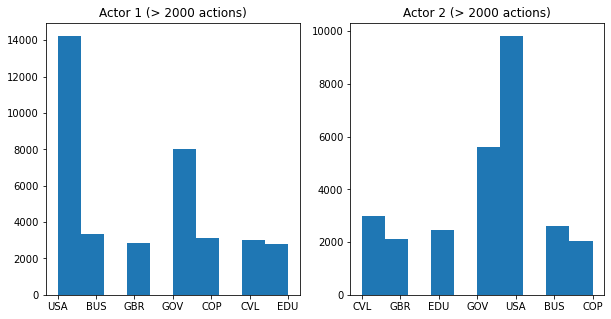

In [39]:
fig = plt.figure(figsize = (10,5))
df2 = final_df.groupby('Actor1Code').filter(lambda x: len(x) > 2000)
df3 = final_df.groupby('Actor2Code').filter(lambda x: len(x) > 2000)

ax1 = plt.subplot (1, 2, 1)
ax1.hist(df2['Actor1Code'])
plt.title('Actor 1 (> 2000 actions)')

ax2 = plt.subplot (1, 2, 2)
ax2.hist(df3['Actor2Code'])
plt.title('Actor 2 (> 2000 actions)')

plt.show()

### Plot with Geopandas

In [15]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [16]:
pip install descartes

Note: you may need to restart the kernel to use updated packages.


In [17]:
# Coordinate Reference System
crs = {'init':'epsg:4326'}

In [18]:
# Create coordinate points based on longitude and latitude information
geometry = [Point(xy) for xy in zip (final_df['ActionGeo_Long'],final_df['ActionGeo_Lat'])]
geometry[:3]

In [19]:
geo_df = gpd.GeoDataFrame(final_df,
                         crs = crs,           # specify coordinate reference system
                         geometry = geometry) # specify geometry list created before
geo_df.head()

/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL,geometry
0,991158199,20200621,202006,2020,2020.4685,LEG,LAWMAKER,NaN,NaN,NaN,...,2,"Illinois, United States",US,USIL,40.3363,-89.0022,IL,20210621,https://qctimes.com/news/state-and-regional/go...,POINT (-89.00220 40.33630)
1,991158200,20200621,202006,2020,2020.4685,USA,CHICAGO,USA,NaN,NaN,...,3,"Chicago, Illinois, United States",US,USIL,41.8500,-87.6501,423587,20210621,https://qctimes.com/news/state-and-regional/go...,POINT (-87.65010 41.85000)
2,991158201,20200621,202006,2020,2020.4685,USA,CHICAGO,USA,NaN,NaN,...,2,"Illinois, United States",US,USIL,40.3363,-89.0022,IL,20210621,https://qctimes.com/news/state-and-regional/go...,POINT (-89.00220 40.33630)
3,991158202,20210522,202105,2021,2021.3890,NaN,NaN,NaN,NaN,NaN,...,4,"Kabul, Kabol, Afghanistan",AF,AF13,34.5167,69.1833,-3378435,20210621,https://ricochet.com/986125/our-feckless-state...,POINT (69.18330 34.51670)
4,991158203,20210522,202105,2021,2021.3890,NaN,NaN,NaN,NaN,NaN,...,4,"Donington, Lincolnshire, United Kingdom",UK,UKH7,52.9000,-0.2000,-2594490,20210621,https://www.pressandjournal.co.uk/lifestyle/mu...,POINT (-0.20000 52.90000)


In [20]:
geo_df.columns

Index(['GLOBALEVENTID', 'SQLDATE', 'MonthYear', 'Year', 'FractionDate',
       'Actor1Code', 'Actor1Name', 'Actor1CountryCode', 'Actor1KnownGroupCode',
       'Actor1EthnicCode', 'Actor1Religion1Code', 'Actor1Religion2Code',
       'Actor1Type1Code', 'Actor1Type2Code', 'Actor1Type3Code', 'Actor2Code',
       'Actor2Name', 'Actor2CountryCode', 'Actor2KnownGroupCode',
       'Actor2EthnicCode', 'Actor2Religion1Code', 'Actor2Religion2Code',
       'Actor2Type1Code', 'Actor2Type2Code', 'Actor2Type3Code', 'IsRootEvent',
       'EventCode', 'EventBaseCode', 'EventRootCode', 'QuadClass',
       'GoldsteinScale', 'NumMentions', 'NumSources', 'NumArticles', 'AvgTone',
       'Actor1Geo_Type', 'Actor1Geo_FullName', 'Actor1Geo_CountryCode',
       'Actor1Geo_ADM1Code', 'Actor1Geo_Lat', 'Actor1Geo_Long',
       'Actor1Geo_FeatureID', 'Actor2Geo_Type', 'Actor2Geo_FullName',
       'Actor2Geo_CountryCode', 'Actor2Geo_ADM1Code', 'Actor2Geo_Lat',
       'Actor2Geo_Long', 'Actor2Geo_FeatureID', 'Action

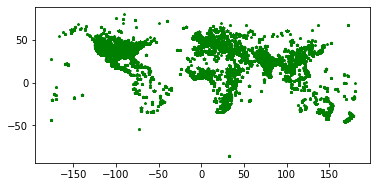

In [22]:
geo_df.plot(marker='*', color='green', markersize=5)

In [23]:
geo_df.to_csv('./conflict_data.csv')

### Exploratory Analytics

#### Description of column meaning
- Actor1KnownGroupCode: IGO/NGO/rebel organization (United Nations, World Bank, al-Qaeda, etc) with its own CAMEO code
- Actor1Type1Code: Police Forces, Government, Military, Political Opposition, Rebels, etc, a broad role class such as Education, Elites, Media, Refugees, or organizational classes like Non-Governmental Movement
- EventRootCode: For example, code “0251” (“Appeal for easing of administrative sanctions”) has a root code of “02” (“Appeal”).
- QuadClass: 1=Verbal Cooperation, 2=Material Cooperation, 3=Verbal Conflict, 4=Material Conflict
- GoldsteinScore: numeric score from -10 to +10, capturing the theoretical potential impact that type of event will have on the stability of a country
- NumMention: How often the conflict is mentioned (also in the same) across papers
- AvgTone: average “tone” of all documents containing one or more mentions of this event. The score ranges from -100 (extremely negative) to +100 (extremely positive)
- Actor1Geo_Type: 1=COUNTRY (match was at the country level), 2=USSTATE (match was to a US state), 3=USCITY (match was to a US city or landmark), 4=WORLDCITY (match was to a city or landmark outside the US), 5=WORLDSTATE (match was to an Administrative Division 1 outside the US – roughly equivalent to a US state)

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<function matplotlib.pyplot.show(*args, **kw)>

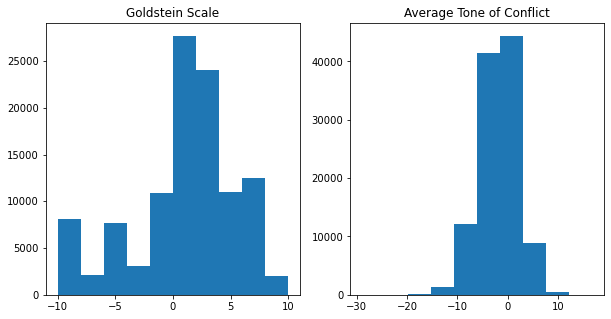

In [24]:
fig = plt.figure(figsize = (10,5))

ax1 = plt.subplot (1, 2, 1)
ax1.hist(geo_df['GoldsteinScale'])
plt.title('Goldstein Scale')

ax2 = plt.subplot (1, 2, 2)
ax2.hist(geo_df['AvgTone'])
plt.title('Average Tone of Conflict')

plt.show

In [25]:
geo_highneg_imp = geo_df.loc[(geo_df['GoldsteinScale'] <= -9)]
geo_highpos_imp = geo_df.loc[(geo_df['GoldsteinScale'] >= 9)]

geo_pos_news = geo_df.loc[(geo_df.AvgTone > geo_df.AvgTone.quantile(0.99))]
geo_neg_news = geo_df.loc[(geo_df.AvgTone < geo_df.AvgTone.quantile(0.01))]

Text(0.5, 1.0, 'Strongly Positive News')

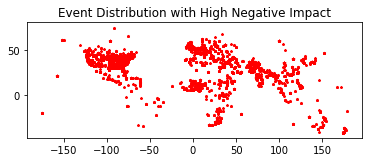

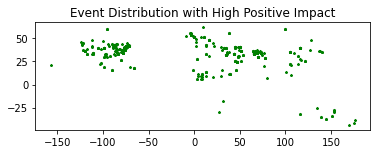

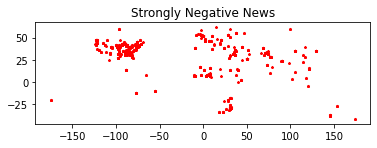

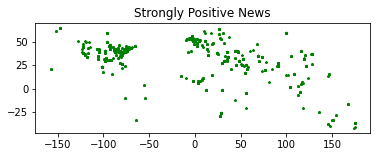

In [26]:
geo_highneg_imp.plot(marker='*', color='red', markersize=5)
plt.title('Event Distribution with High Negative Impact')
geo_highpos_imp.plot(marker='*', color='green', markersize=5)
plt.title('Event Distribution with High Positive Impact')
geo_neg_news.plot(marker='*', color='red', markersize=5)
plt.title('Strongly Negative News')
geo_pos_news.plot(marker='*', color='green', markersize=5)
plt.title('Strongly Positive News')

## Machine Learning
- Prediction target: Goldstein Scale, AvgTone
- Train Neural Network Model that considers highly dimensional data | PCA analysis | k-means clustering

### Prepare prediction target

In [27]:
import sklearn as sk

In [28]:
ml_set = geo_df.iloc[0:10000]
ml_set.to_csv('./conflict_data_extract.csv')

In [29]:
impact = []

for i in ml_set['GoldsteinScale']:
    if i < 0:
        impact.append(-1)
    else:
        impact.append(1)

In [30]:
ml_set['Impact'] = impact

/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


### Dataset Encoding and Transformation
- Apply one-hot encoder - results in massively increased dataframe / matrix size (from 22 to 8,554 features)

In [31]:
X = ml_set[['MonthYear','Year','Actor1Code','Actor1Name','Actor1KnownGroupCode','Actor1EthnicCode',
 'Actor1Religion1Code','Actor1Type1Code','Actor2Code','Actor2Name','Actor2KnownGroupCode',
 'Actor2EthnicCode','Actor2Religion1Code','Actor2Type1Code','QuadClass','NumMentions','NumSources',
 'AvgTone','Actor1Geo_Type','Actor1Geo_FullName','Actor2Geo_Type','Actor2Geo_FullName']]

X = X.fillna('None')

Y = ml_set.Impact

In [32]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [33]:
enc_o = OneHotEncoder()
enc_o.fit(X)
X_trans = enc_o.transform(X)

print(X.to_numpy().shape)
print(X_trans.shape)

(10000, 22)
(10000, 8800)


### Train-Test Split

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_trans, Y)

### Model Fitting: Logistic Regression and Decision Tree

In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

print("Results for LogisticRegression; train: {:.3f} test: {:.3f}".format(lr.score(X_train, y_train), lr.score(X_test, y_test))) 
print("LogisticRegression coefs: {} and intercept: {}".format(lr.coef_, lr.intercept_)) 

Results for LogisticRegression; train: 0.977 test: 0.967
LogisticRegression coefs: [[ 0.27356161 -0.28206814 -0.03567438 ...  0.0055225   0.012485
   0.03511323]] and intercept: [-0.28369087]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
print("DecisionTreeClassifier training score: {:.3f}".format(tree.score(X_train,y_train)))
print("DecisionTreeClassifier test score: {:.3f}".format(tree.score(X_test,y_test)))

DecisionTreeClassifier training score: 0.955
DecisionTreeClassifier test score: 0.962


In [44]:
columns = list(range(0,8800))
DataFrame = pd.DataFrame([tree.feature_importances_],columns=columns)
DataFrame.sort_values(0, axis = 1, ascending = False)

,2626,2627,6888,3503,8662,5868,5864,5865,5866,5867,...,2933,2932,2931,2930,2929,2928,2927,2926,2925,8799
0,0.703495,0.281759,0.007345,0.003704,0.003697,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
from sklearn.metrics import classification_report, precision_score, recall_score

y_pred = tree.predict(X_test)

rec = recall_score(y_test, y_pred)
print("Recall of the Tree: {:.3f}".format(rec))

pre = precision_score(y_test, y_pred)
print("Precision of the Tree: {:.3f}".format(pre))

report = classification_report(y_test, y_pred)
print(report)

Recall of the Tree: 1.000
Precision of the Tree: 0.940
              precision    recall  f1-score   support

          -1       1.00      0.84      0.92       729
           1       0.94      1.00      0.97      1771

    accuracy                           0.95      2500
   macro avg       0.97      0.92      0.94      2500
weighted avg       0.96      0.95      0.95      2500



In [ ]:
Y_train.value_counts()

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
plt.title('Decision Tree Confusion Matrix')

## Applying Models only with Label Encoder and reduced Feature Set

### Dataset Preparation and Label Encoding on Categorical Values

In [49]:
X = ml_set[['MonthYear','Actor1Code','Actor1Name','Actor2Code','Actor2Name','Actor2Type1Code','QuadClass','NumMentions','NumSources',
 'AvgTone','Actor1Geo_Type','Actor2Geo_Type']]

X = X.fillna('None')

impact = []

for i in ml_set['GoldsteinScale']:
    if i < 0:
        impact.append(-1)
    else:
        impact.append(1)

ml_set['Impact'] = impact
        
Y = ml_set.Impact

/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [50]:
columns = ['Actor1Code','Actor1Name','Actor2Code','Actor2Name','Actor2Type1Code']

### Label Encoder and Train-Test Split

In [51]:
# Label Encoder

from sklearn.preprocessing import LabelEncoder

enc_l = LabelEncoder()


for i in columns:
    enc_l.fit(X[i])
    X[i] = enc_l.transform(X[i])

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y)

### Model Fitting: Logistic Regression and Decision Tree

In [53]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

print("Results for LogisticRegression; train: {:.3f} test: {:.3f}".format(lr.score(X_train, y_train), lr.score(X_test, y_test)))  

Results for LogisticRegression; train: 0.724 test: 0.725


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
print("DecisionTreeClassifier training score: {:.3f}".format(tree.score(X_train,y_train)))
print("DecisionTreeClassifier test score: {:.3f}".format(tree.score(X_test,y_test)))

DecisionTreeClassifier training score: 0.956
DecisionTreeClassifier test score: 0.954


In [56]:
pd.DataFrame([tree.feature_importances_],columns = list(X_train.columns))

,MonthYear,Actor1Code,Actor1Name,Actor2Code,Actor2Name,Actor2Type1Code,QuadClass,NumMentions,NumSources,AvgTone,Actor1Geo_Type,Actor2Geo_Type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.993314,0.0,0.0,0.006686,0.0,0.0


In [57]:
y_pred = tree.predict(X_test)

rec = recall_score(y_test, y_pred)
print("Recall of the Tree: {:.3f}".format(rec))

pre = precision_score(y_test, y_pred)
print("Precision of the Tree: {:.3f}".format(pre))

report = classification_report(y_test, y_pred)
print(report)

Recall of the Tree: 1.000
Precision of the Tree: 0.940
              precision    recall  f1-score   support

          -1       1.00      0.84      0.92       729
           1       0.94      1.00      0.97      1771

    accuracy                           0.95      2500
   macro avg       0.97      0.92      0.94      2500
weighted avg       0.96      0.95      0.95      2500



Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

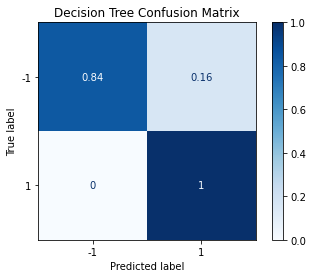

In [59]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(tree, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
plt.title('Decision Tree Confusion Matrix')